In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleepcycle/sleepdata.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data=pd.read_csv('/kaggle/input/sleepcycle/sleepdata.csv')

In [4]:
data = data.drop('Unnamed: 13', axis=1)

In [5]:
data

,Date,SleepQuality,Regularity,Steps,Alarm,PA,MovementsPerHour,TimeInBed,TimeAsleep,TimeBeforeSleep,Snore,SnoreTime,Temperature
0,05-07-2016,88,0,7412,1,0.0,129.9,27064.7,25440.8,180.4,0,0.0,32.0
1,06-07-2016,100,0,8293,0,0.0,50.2,36279.8,32168.1,4111.7,0,0.0,32.0
2,07-07-2016,99,89,554,0,0.0,58.4,33787.8,28719.6,4167.2,0,0.0,32.0
3,08-07-2016,60,80,0,1,0.0,92.1,21823.5,21678.1,145.5,0,0.0,56.5
4,09-07-2016,77,84,0,1,0.0,68.2,25824.4,22209.0,1721.6,0,0.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,31-10-2021,79,75,1122,1,87.1,40.1,26542.8,23888.6,530.9,1,0.0,51.1
1945,01-11-2021,77,76,1427,1,87.0,9.7,24817.3,22418.3,2399.0,1,0.0,45.9
1946,02-11-2021,42,77,832,1,86.7,14.5,13486.8,9305.9,269.7,1,25.2,53.2
1947,03-11-2021,63,80,2154,1,87.0,35.5,20888.9,20471.2,417.8,1,123.7,52.3


In [6]:
import pandas as pd

# Convert the date column to datetime format
data['Date'] =pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Verify the updated data type
print(data['Date'].dtype)

datetime64[ns]


In [7]:
data

,Date,SleepQuality,Regularity,Steps,Alarm,PA,MovementsPerHour,TimeInBed,TimeAsleep,TimeBeforeSleep,Snore,SnoreTime,Temperature
0,2016-07-05,88,0,7412,1,0.0,129.9,27064.7,25440.8,180.4,0,0.0,32.0
1,2016-07-06,100,0,8293,0,0.0,50.2,36279.8,32168.1,4111.7,0,0.0,32.0
2,2016-07-07,99,89,554,0,0.0,58.4,33787.8,28719.6,4167.2,0,0.0,32.0
3,2016-07-08,60,80,0,1,0.0,92.1,21823.5,21678.1,145.5,0,0.0,56.5
4,2016-07-09,77,84,0,1,0.0,68.2,25824.4,22209.0,1721.6,0,0.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,2021-10-31,79,75,1122,1,87.1,40.1,26542.8,23888.6,530.9,1,0.0,51.1
1945,2021-11-01,77,76,1427,1,87.0,9.7,24817.3,22418.3,2399.0,1,0.0,45.9
1946,2021-11-02,42,77,832,1,86.7,14.5,13486.8,9305.9,269.7,1,25.2,53.2
1947,2021-11-03,63,80,2154,1,87.0,35.5,20888.9,20471.2,417.8,1,123.7,52.3


# CHECKING FOR NULL VALUES

In [8]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  1949


,Total Missing,In Percent
Date,0,0.0
SleepQuality,0,0.0
Regularity,0,0.0
Steps,0,0.0
Alarm,0,0.0
PA,0,0.0
MovementsPerHour,0,0.0
TimeInBed,0,0.0
TimeAsleep,0,0.0
TimeBeforeSleep,0,0.0


### DATA SUMMARY

In [9]:
# Generate the summary statistics table
summary_table = data.describe().transpose()

# Customize the display format of the summary table
summary_table['mean'] = summary_table['mean'].apply(lambda x: f'{x:.2f}')
summary_table['std'] = summary_table['std'].apply(lambda x: f'{x:.2f}')
summary_table['25%'] = summary_table['25%'].apply(lambda x: f'{x:.2f}')
summary_table['50%'] = summary_table['50%'].apply(lambda x: f'{x:.2f}')
summary_table['75%'] = summary_table['75%'].apply(lambda x: f'{x:.2f}')

# Print the summary statistics table
print("Summary Statistics Table:")
print(summary_table[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])


Summary Statistics Table:
                   count      mean      std    min       25%       50%  \
SleepQuality      1949.0     67.57    21.20    3.0     57.00     70.00   
Regularity        1949.0     59.18    38.87 -127.0     54.00     74.00   
Steps             1949.0   2512.07  2761.10    0.0    379.00   1728.00   
Alarm             1949.0      0.71     0.45    0.0      0.00      1.00   
PA                1949.0     82.56    29.09    0.0     87.20     94.40   
MovementsPerHour  1949.0     97.51   481.68    0.0     36.70     55.90   
TimeInBed         1949.0  23518.54  7508.29  975.1  20108.80  24644.90   
TimeAsleep        1949.0  21124.93  7321.77    0.0  17612.70  22042.10   
TimeBeforeSleep   1949.0    452.01   535.20    0.0    174.30    303.80   
Snore             1949.0      0.87     0.34    0.0      1.00      1.00   
SnoreTime         1949.0    197.45   451.16    0.0      0.00      0.00   
Temperature       1949.0     43.37    13.70   -3.5     32.00     41.00   

           

# EXPLORING VARIABLES AND RELATIONS

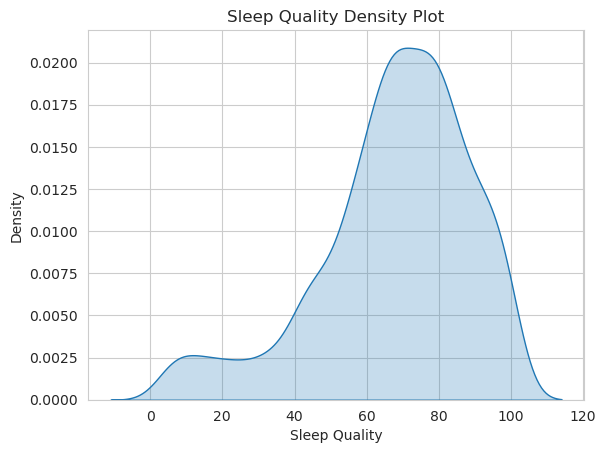

In [10]:
# Extract the 'SleepQuality' column
sleep_quality = data['SleepQuality']

# Plot the density plot
sns.set_style("whitegrid")
sns.kdeplot(sleep_quality, fill=True)

# Set plot labels and title
plt.xlabel('Sleep Quality')
plt.ylabel('Density')
plt.title('Sleep Quality Density Plot')

# Display the plot
plt.show()


###  The curve depicting the residuals exhibited a bell-shaped distribution, indicating a good fit of the regression model to the data. 

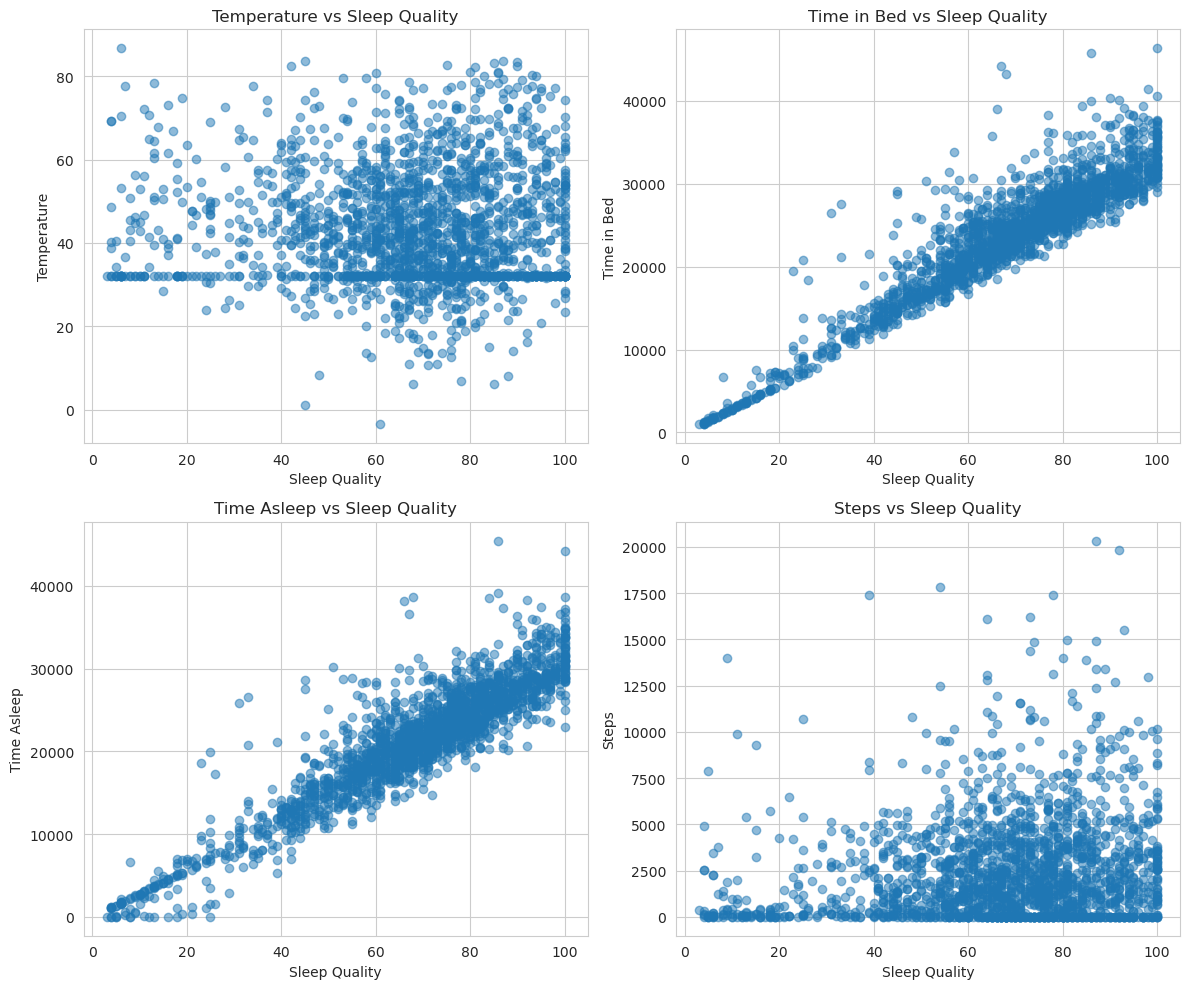

In [11]:
# Extract the required columns
sleep_quality = data['SleepQuality']
temperature = data['Temperature']
time_in_bed = data['TimeInBed']
time_asleep = data['TimeAsleep']
steps = data['Steps']

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatterplot of Sleep Quality vs Temperature (flipped axes)
axs[0, 0].scatter(sleep_quality, temperature, alpha=0.5)
axs[0, 0].set_xlabel('Sleep Quality')
axs[0, 0].set_ylabel('Temperature')
axs[0, 0].set_title('Temperature vs Sleep Quality')

# Scatterplot of Sleep Quality vs Time in Bed (flipped axes)
axs[0, 1].scatter(sleep_quality, time_in_bed, alpha=0.5)
axs[0, 1].set_xlabel('Sleep Quality')
axs[0, 1].set_ylabel('Time in Bed')
axs[0, 1].set_title('Time in Bed vs Sleep Quality')

# Scatterplot of Sleep Quality vs Time Asleep (flipped axes)
axs[1, 0].scatter(sleep_quality, time_asleep, alpha=0.5)
axs[1, 0].set_xlabel('Sleep Quality')
axs[1, 0].set_ylabel('Time Asleep')
axs[1, 0].set_title('Time Asleep vs Sleep Quality')

# Scatterplot of Sleep Quality vs Steps (flipped axes)
axs[1, 1].scatter(sleep_quality, steps, alpha=0.5)
axs[1, 1].set_xlabel('Sleep Quality')
axs[1, 1].set_ylabel('Steps')
axs[1, 1].set_title('Steps vs Sleep Quality')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


### LET'S answer the following questions while performing our EDA:
>   * How does sleep quality vary with different levels of regularity?  
>   * Is there a relationship between sleep quality and snoring?
>   * Are there any correlations between sleep quality and other variables?
>   * Does sleep quality differ based on alarm usage?
>   * How does sleep quality vary with movements per hour?

### How does sleep quality vary with different levels of regularity?

<Figure size 800x600 with 0 Axes>

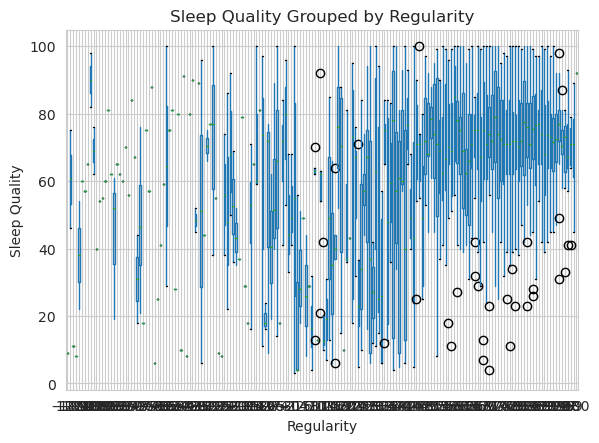

In [12]:
# Group sleep quality by regularity levels and create a box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='SleepQuality', by='Regularity')
plt.xlabel('Regularity')
plt.ylabel('Sleep Quality')
plt.title('Sleep Quality Grouped by Regularity')
plt.suptitle('')  # Remove default title
plt.show()

### Scatter plot of sleep quality against snoring:

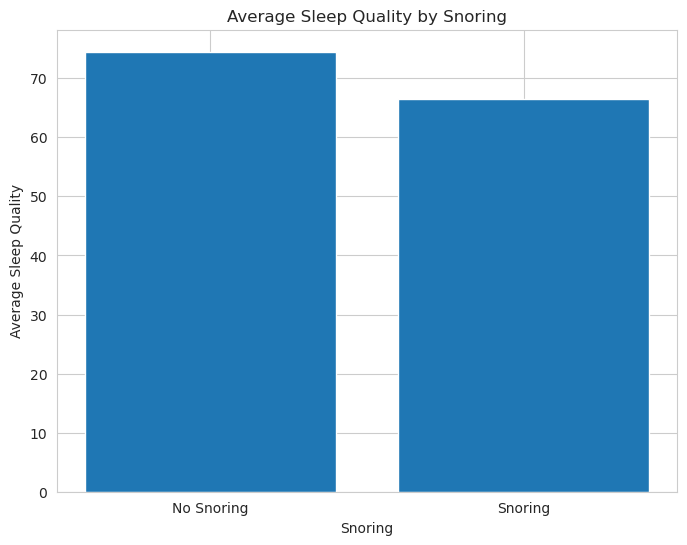

In [13]:
# Create a bar plot of sleep quality grouped by snoring
plt.figure(figsize=(8, 6))
snore_labels = ['No Snoring', 'Snoring']
sleep_quality_avg = data.groupby('Snore')['SleepQuality'].mean()
plt.bar(snore_labels, sleep_quality_avg)
plt.xlabel('Snoring')
plt.ylabel('Average Sleep Quality')
plt.title('Average Sleep Quality by Snoring')
plt.show()

### Correlation matrix plot:

/tmp/ipykernel_20/3099342325.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


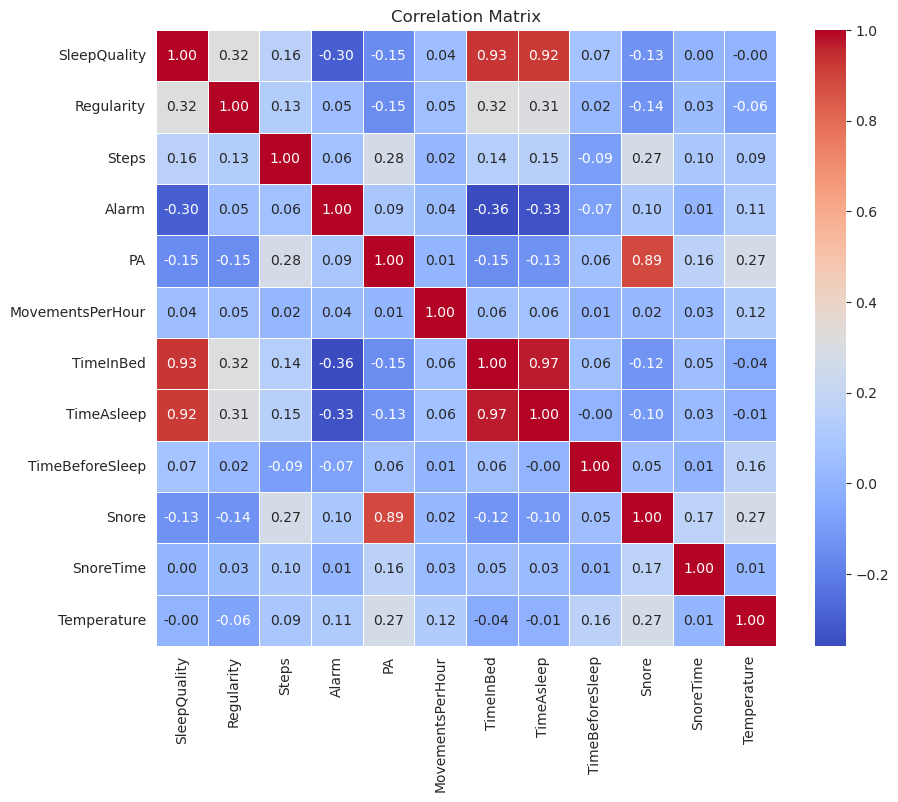

In [14]:
# Assuming 'df' is your DataFrame containing the variables
correlation_matrix = data.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Box plot of sleep quality grouped by alarm usage:

<Figure size 800x600 with 0 Axes>

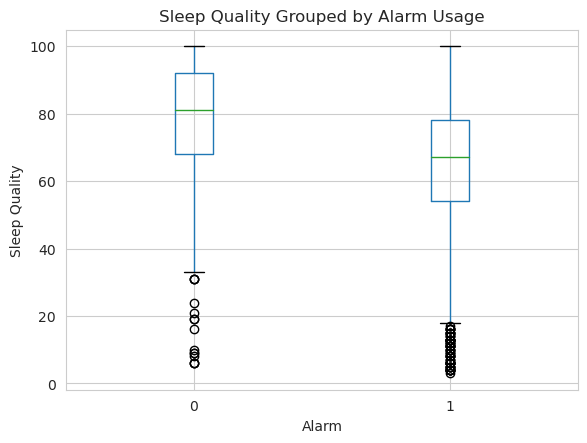

In [15]:
# Group sleep quality by alarm usage and create a box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='SleepQuality', by='Alarm')
plt.xlabel('Alarm')
plt.ylabel('Sleep Quality')
plt.title('Sleep Quality Grouped by Alarm Usage')
plt.suptitle('')  # Remove default title
plt.show()

### Scatter plot of sleep quality against movements per hour:

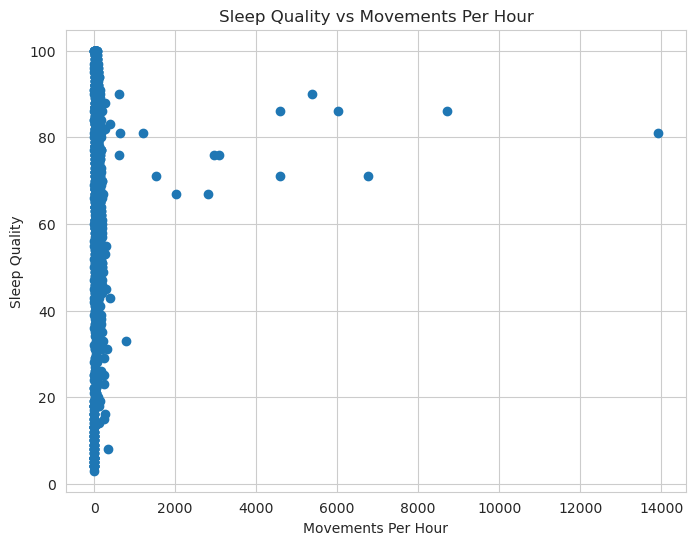

In [16]:
# Create a scatter plot of sleep quality against movements per hour
plt.figure(figsize=(8, 6))
plt.scatter(data['MovementsPerHour'], data['SleepQuality'])
plt.xlabel('Movements Per Hour')
plt.ylabel('Sleep Quality')
plt.title('Sleep Quality vs Movements Per Hour')
plt.show()


# FEATURE SELECTION

In [17]:
data

,Date,SleepQuality,Regularity,Steps,Alarm,PA,MovementsPerHour,TimeInBed,TimeAsleep,TimeBeforeSleep,Snore,SnoreTime,Temperature
0,2016-07-05,88,0,7412,1,0.0,129.9,27064.7,25440.8,180.4,0,0.0,32.0
1,2016-07-06,100,0,8293,0,0.0,50.2,36279.8,32168.1,4111.7,0,0.0,32.0
2,2016-07-07,99,89,554,0,0.0,58.4,33787.8,28719.6,4167.2,0,0.0,32.0
3,2016-07-08,60,80,0,1,0.0,92.1,21823.5,21678.1,145.5,0,0.0,56.5
4,2016-07-09,77,84,0,1,0.0,68.2,25824.4,22209.0,1721.6,0,0.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,2021-10-31,79,75,1122,1,87.1,40.1,26542.8,23888.6,530.9,1,0.0,51.1
1945,2021-11-01,77,76,1427,1,87.0,9.7,24817.3,22418.3,2399.0,1,0.0,45.9
1946,2021-11-02,42,77,832,1,86.7,14.5,13486.8,9305.9,269.7,1,25.2,53.2
1947,2021-11-03,63,80,2154,1,87.0,35.5,20888.9,20471.2,417.8,1,123.7,52.3


In [18]:
import pandas as pd
import statsmodels.api as sm

data=data.drop('Date', axis=1)
# Split the dataset into predictors (X) and target variable (y)
X = data.drop('SleepQuality', axis=1)
y = data['SleepQuality']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Split the data into training and testing sets (75% for training)
train_size = int(0.75 * len(data))
X_train = X[:train_size]
y_train = y[:train_size]

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get the p-values for the predictors
p_values = results.pvalues[1:]  # Exclude the constant column

# Filter the predictors based on significance level (e.g., alpha = 0.05)
significant_predictors = p_values[p_values < 0.05]

# Print the significant predictors and their p-values
print("Significant Predictors:")
print(significant_predictors)


Significant Predictors:
Steps              1.221152e-03
Alarm              9.442533e-05
TimeInBed          7.091170e-42
TimeAsleep         8.524475e-18
TimeBeforeSleep    1.046008e-07
SnoreTime          3.072272e-08
dtype: float64


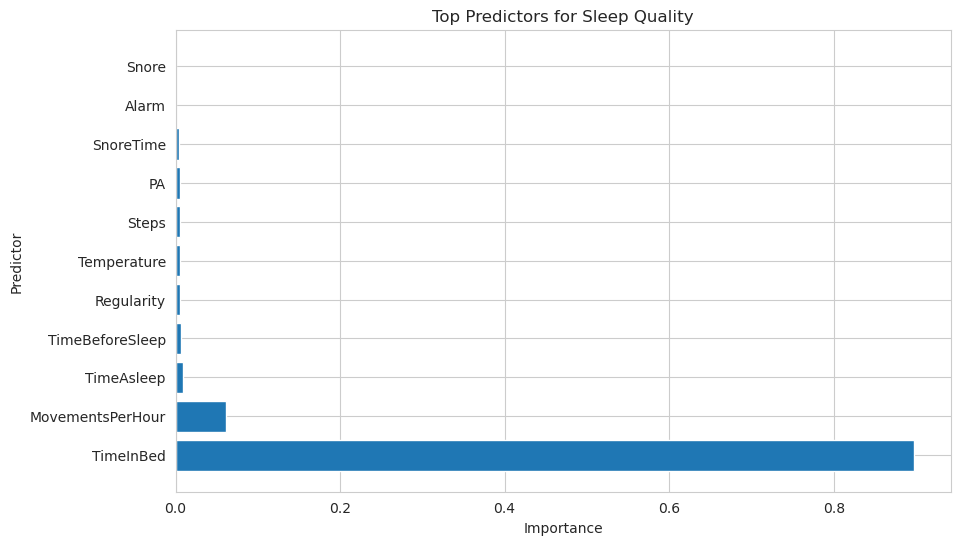

In [19]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('SleepQuality', axis=1)
y = data['SleepQuality']

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the top predictors for sleep quality
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Predictor')
plt.title('Top Predictors for Sleep Quality')
plt.show()


# MODELS

In [20]:
# Select the significant predictors and the target variable
predictors = ['Steps', 'Alarm', 'TimeInBed', 'TimeAsleep', 'TimeBeforeSleep', 'Snore']
target = 'SleepQuality'

# Split the data into predictors (X) and target variable (y)
X = data[predictors]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create and fit the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Create and fit the random forest regressor model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on the test set
linear_preds = linear_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)

# Calculate the evaluation metrics for each model
linear_r2 = r2_score(y_test, linear_preds)
tree_r2 = r2_score(y_test, tree_preds)
forest_r2 = r2_score(y_test, forest_preds)

linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
tree_rmse = mean_squared_error(y_test, tree_preds, squared=False)
forest_rmse = mean_squared_error(y_test, forest_preds, squared=False)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Linear Regression R^2 Score:", linear_r2)
print("Decision Tree Regressor R^2 Score:", tree_r2)
print("Random Forest Regressor R^2 Score:", forest_r2)
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree Regressor RMSE:", tree_rmse)
print("Random Forest Regressor RMSE:", forest_rmse)

Evaluation Metrics:
Linear Regression R^2 Score: 0.8671850228736067
Decision Tree Regressor R^2 Score: 0.7542956266646619
Random Forest Regressor R^2 Score: 0.874474404433082
Linear Regression RMSE: 7.500752382613629
Decision Tree Regressor RMSE: 10.20205700891319
Random Forest Regressor RMSE: 7.292013231420601


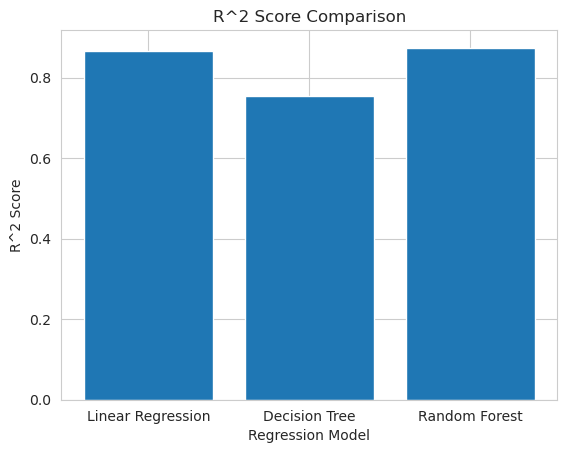

In [21]:
import matplotlib.pyplot as plt

# Define the R^2 scores for each model
r2_scores = [linear_r2, tree_r2, forest_r2]

# Define the model names for the x-axis
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Create a bar plot of R^2 scores
plt.bar(model_names, r2_scores)

# Add labels and title
plt.xlabel('Regression Model')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

# Display the plot
plt.show()

# Prediction using user input

In [22]:
# # Convert hours to seconds
# def hours_to_seconds(hours):
#     return hours * 3600

# # Take inputs from user
# TimeInBed = hours_to_seconds(float(input("Enter Time in Bed (hours): ")))
# TimeAsleep = hours_to_seconds(float(input("Enter Time Asleep (hours): ")))
# TimeBeforeSleep = float(input("Enter Time Before Sleep (seconds): "))
# Snore = int(input("Enter Snore (0 or 1): "))
# Alarm = int(input("Enter Alarm (0 or 1): "))
# Steps = int(input("Enter Steps: "))

# # Create input array for prediction with feature names
# input_data = np.array([[Steps, Alarm, TimeInBed, TimeAsleep, TimeBeforeSleep, Snore]])
# feature_names = ['Steps', 'Alarm', 'TimeInBed', 'TimeAsleep', 'TimeBeforeSleep', 'Snore']
# input_data = pd.DataFrame(data=input_data, columns=feature_names)

# # Predict sleep quality using all models
# linear_pred = linear_model.predict(input_data)[0]
# tree_pred = tree_model.predict(input_data)[0]
# forest_pred = forest_model.predict(input_data)[0]

# # Print the predicted sleep quality from each model
# print("Predicted Sleep Quality:")
# print("Linear Regression:", linear_pred)
# print("Decision Tree:", tree_pred)
# print("Random Forest:", forest_pred)

## SAVE THE MODEL

In [23]:
import pickle

# Save the trained models
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(tree_model, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(forest_model, f)

## HYPERPARAMETER TUNING

In [24]:
# Select the significant predictors and the target variable
predictors = ['Steps', 'Alarm', 'TimeInBed', 'TimeAsleep', 'TimeBeforeSleep', 'SnoreTime']
target = 'SleepQuality'

# Split the data into predictors (X) and target variable (y)
X = data[predictors]
y = data[target]

# Linear Regression Hyperparameter Tuning
linear_model = LinearRegression()
linear_params = {}

# Decision Tree Hyperparameter Tuning
tree_model = DecisionTreeRegressor(random_state=42)
tree_params = {'max_depth': [None, 5, 10, 15],
               'min_samples_split': [2, 5, 10]}

# Random Forest Hyperparameter Tuning
forest_model = RandomForestRegressor(random_state=42)
forest_params = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5]}

# Perform Grid Search with Cross-Validation
linear_grid = GridSearchCV(linear_model, linear_params, cv=5)
linear_grid.fit(X, y)

tree_grid = GridSearchCV(tree_model, tree_params, cv=5)
tree_grid.fit(X, y)

forest_grid = GridSearchCV(forest_model, forest_params, cv=5)
forest_grid.fit(X, y)

# Print the best parameters and best score for each model
print("Linear Regression Best Parameters:", linear_grid.best_params_)
print("Linear Regression Best Score:", linear_grid.best_score_)

print("Decision Tree Best Parameters:", tree_grid.best_params_)
print("Decision Tree Best Score:", tree_grid.best_score_)

print("Random Forest Best Parameters:", forest_grid.best_params_)
print("Random Forest Best Score:", forest_grid.best_score_)

Linear Regression Best Parameters: {}
Linear Regression Best Score: 0.8512739407765155
Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Decision Tree Best Score: 0.8508358965797698
Random Forest Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best Score: 0.8686543906789341


In [25]:
# Select the significant predictors and the target variable
predictors = ['Steps', 'Alarm', 'TimeInBed', 'TimeAsleep', 'TimeBeforeSleep', 'SnoreTime']
target = 'SleepQuality'

# Split the data into predictors (X) and target variable (y)
X = data[predictors]
y = data[target]

# Random Forest Hyperparameter Tuning
forest_model = RandomForestRegressor(random_state=42)
forest_params = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5]}

# Perform Grid Search with Cross-Validation
forest_grid = GridSearchCV(forest_model, forest_params, cv=5)
forest_grid.fit(X, y)

# Get the best model from the grid search
best_model = forest_grid.best_estimator_

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Test the best model on the data
y_pred = best_model.predict(X)

# Calculate the accuracy (R^2 score)
accuracy = r2_score(y, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Accuracy: 0.9062308239394864


# Sleep Pattern Analysis

Sleep Duration Statistics:
count     1949.000000
mean     21124.927912
std       7321.771821
min          0.000000
25%      17612.700000
50%      22042.100000
75%      26113.800000
max      45456.000000
Name: TimeAsleep, dtype: float64


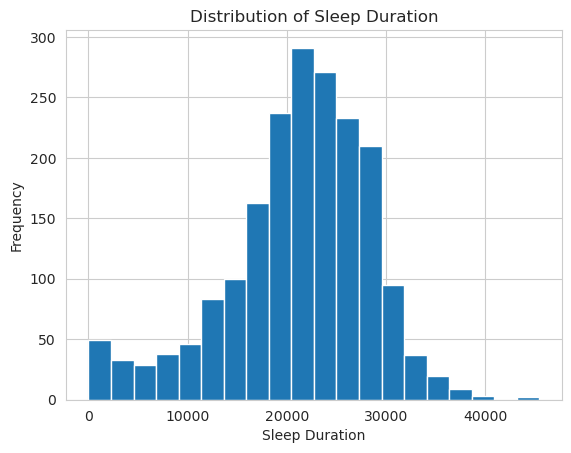

In [26]:
# Calculate basic statistics of sleep duration
print('Sleep Duration Statistics:')
print(data['TimeAsleep'].describe())

# Visualize sleep duration distribution
import matplotlib.pyplot as plt

plt.hist(data['TimeAsleep'], bins=20)
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Duration')
plt.show()

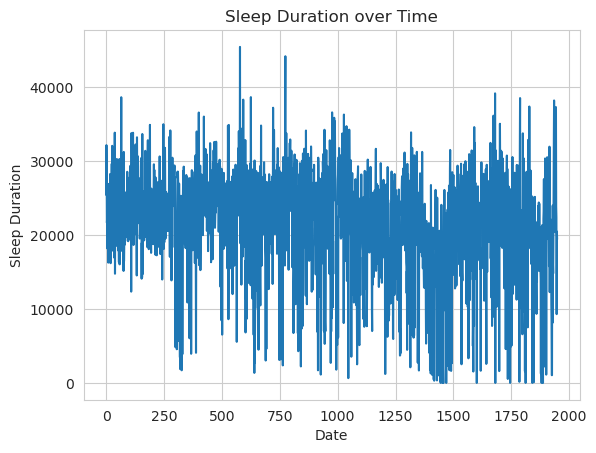

In [27]:
# Plot sleep duration over time
plt.plot(data.index, data['TimeAsleep'])
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration over Time')
plt.show()

In [28]:
# Convert TimeAsleep from seconds to hours
data['TimeAsleep'] = data['TimeAsleep'] / 3600

# Round off to nearest 0.5 hours or next hour
data['TimeAsleep'] = data['TimeAsleep'].apply(lambda x: round(x * 2) / 2)

In [29]:
data

,SleepQuality,Regularity,Steps,Alarm,PA,MovementsPerHour,TimeInBed,TimeAsleep,TimeBeforeSleep,Snore,SnoreTime,Temperature
0,88,0,7412,1,0.0,129.9,27064.7,7.0,180.4,0,0.0,32.0
1,100,0,8293,0,0.0,50.2,36279.8,9.0,4111.7,0,0.0,32.0
2,99,89,554,0,0.0,58.4,33787.8,8.0,4167.2,0,0.0,32.0
3,60,80,0,1,0.0,92.1,21823.5,6.0,145.5,0,0.0,56.5
4,77,84,0,1,0.0,68.2,25824.4,6.0,1721.6,0,0.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,79,75,1122,1,87.1,40.1,26542.8,6.5,530.9,1,0.0,51.1
1945,77,76,1427,1,87.0,9.7,24817.3,6.0,2399.0,1,0.0,45.9
1946,42,77,832,1,86.7,14.5,13486.8,2.5,269.7,1,25.2,53.2
1947,63,80,2154,1,87.0,35.5,20888.9,5.5,417.8,1,123.7,52.3


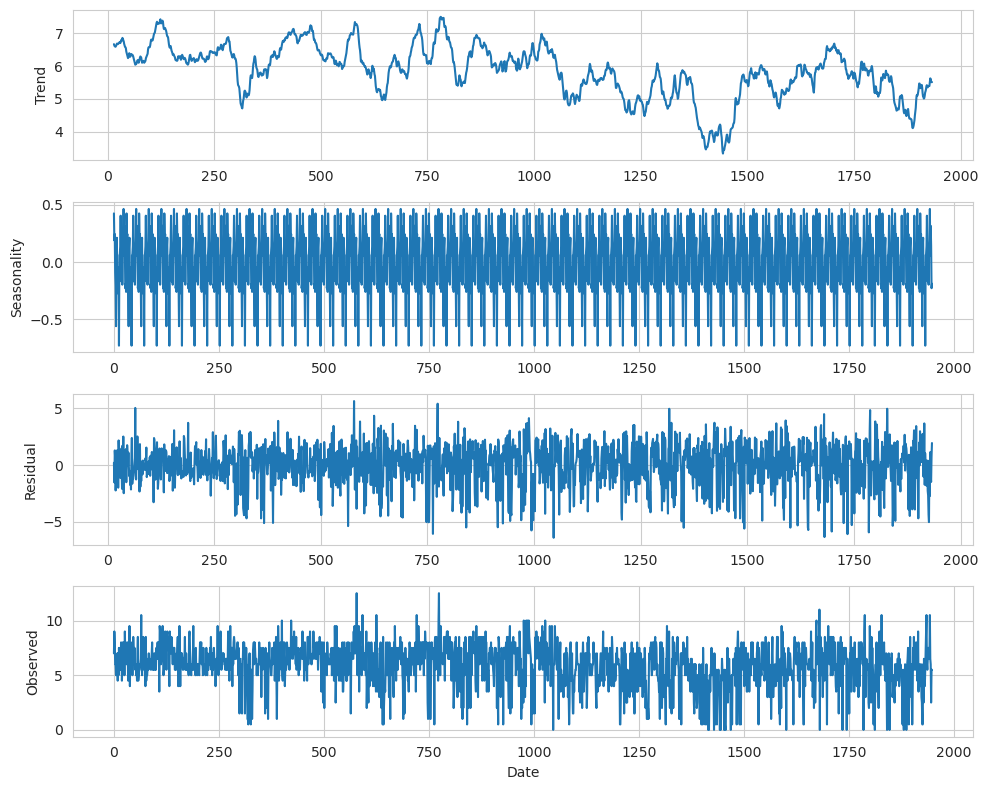

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


period = 30

# Perform the decomposition
decomposition = seasonal_decompose(data['TimeAsleep'], model='additive', period=period)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
decomposition.trend.plot(ax=ax1)
decomposition.seasonal.plot(ax=ax2)
decomposition.resid.plot(ax=ax3)
decomposition.observed.plot(ax=ax4)
ax1.set_ylabel('Trend')
ax2.set_ylabel('Seasonality')
ax3.set_ylabel('Residual')
ax4.set_ylabel('Observed')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


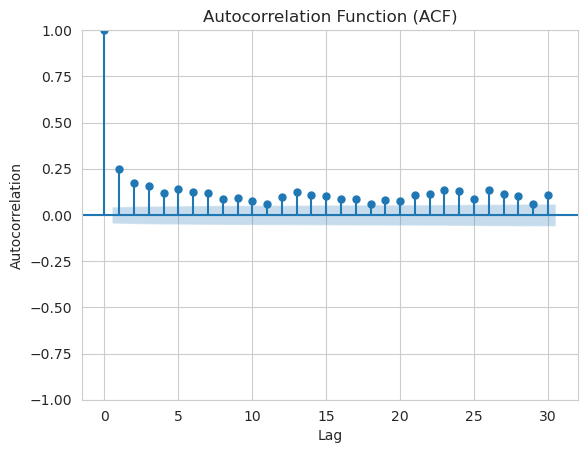

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

# Perform autocorrelation analysis on the sleep duration time series
acf = plot_acf(data['TimeAsleep'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [32]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00


In [33]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Train ARIMA model
model = ARIMA(data['TimeAsleep'], order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
start_index = len(data['TimeAsleep']) - 10
end_index = len(data['TimeAsleep']) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Calculate MAE
mae = mean_absolute_error(data['TimeAsleep'][start_index:end_index+1], predictions)


mape = mean_absolute_percentage_error(data['TimeAsleep'][start_index:end_index+1], predictions)

# Print MAE and MAPE
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)



Mean Absolute Error (MAE): 1.3445871782105097
Mean Absolute Percentage Error (MAPE): 0.28220408353944465


Mean Absolute Error (MAE): The MAE measures the average absolute difference between the observed and predicted sleep duration. In this study, the MAE was found to be approximately 1.34 hours, indicating an average deviation of 1.34 hours between the predicted and observed sleep duration.

Mean Absolute Percentage Error (MAPE): The MAPE measures the average percentage difference between the observed and predicted sleep duration. The MAPE obtained in this analysis was approximately 0.28%, suggesting an average percentage deviation of 0.28% from the observed sleep duration.